In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data= pd.read_csv("D:\ML project\weatherdata.csv")
data= data.dropna()
print(data.shape)
print(list(data.columns))

(8034, 18)
['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TEMP', 'DEWP', 'SLP', 'STP', 'VISIB', 'WDSP', 'MXSPD', 'GUST', 'MAX', 'MIN', 'PRCP', 'Class']


In [3]:
data.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,Class
0,72290403178,1/1/2012,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",58.1,44.2,1019.1,999.9,7.2,2.3,8.9,0.0,77.0,44.1,0.0,0
1,72290403178,1/2/2012,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",58.3,43.4,1021.0,2.1,8.9,1.2,7.0,0.0,75.0,42.8,0.0,0
2,72290403178,1/3/2012,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",58.4,44.3,1021.6,2.6,8.5,3.7,9.9,0.0,75.0,45.0,0.0,0
3,72290403178,1/4/2012,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",64.2,38.6,1022.3,3.3,9.4,3.5,8.0,0.0,87.1,48.9,0.0,0
4,72290403178,1/5/2012,32.57222,-116.97944,157.0,"SAN DIEGO BROWN FIELD, CA US",68.0,27.5,1020.1,1.3,10.0,5.0,11.1,0.0,84.0,55.9,0.0,0


In [4]:
data['Class'].value_counts()

0    7865
1     169
Name: Class, dtype: int64

C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


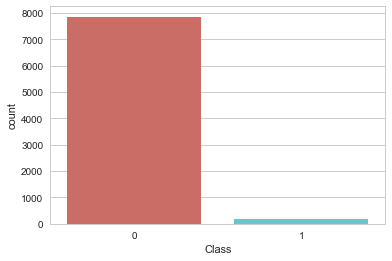

In [5]:
sns.countplot(x='Class',data=data,palette ='hls')
plt.show()


In [6]:
count_no_sub = len(data[data['Class']==0])
count_sub = len(data[data['Class']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no fire is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of fire", pct_of_sub*100)

percentage of no fire is 97.89644012944983
percentage of fire 2.103559870550162


In [7]:
data.groupby('Class').mean()

,STATION,LATITUDE,LONGITUDE,ELEVATION,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP
Class,,,,,,,,,,,,,,,
0,7.229024e+10,32.707213,-117.10065,96.244984,63.951494,52.134533,1033.659873,461.886484,9.220102,4.437546,11.181767,5.445874,74.653020,58.149561,0.025766
1,7.229024e+10,32.709769,-117.10330,94.612426,73.264497,55.567456,1066.300000,569.902959,9.293491,4.693491,10.876331,4.881065,85.270414,63.518935,0.000414


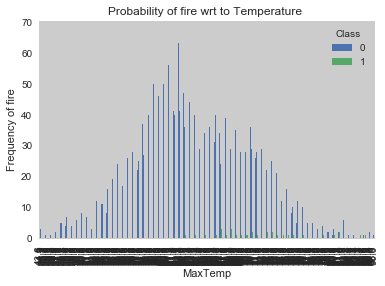

In [8]:
%matplotlib inline
pd.crosstab(data.TEMP,data.Class).plot(kind='bar')
plt.title('Probability of fire wrt to Temperature ')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency of fire')
plt.savefig('Probability of fire')

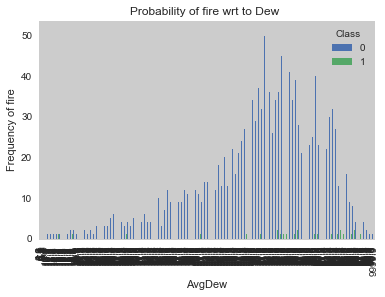

In [9]:
%matplotlib inline
pd.crosstab(data.DEWP,data.Class).plot(kind='bar')
plt.title('Probability of fire wrt to Dew ')
plt.xlabel('AvgDew')
plt.ylabel('Frequency of fire')
plt.savefig('Probability of fire')

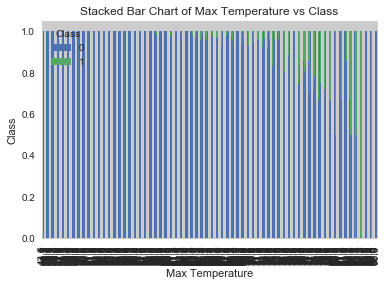

In [10]:
table=pd.crosstab(data.TEMP,data.Class)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Max Temperature vs Class')
plt.xlabel('Max Temperature')
plt.ylabel('Class')
plt.savefig('Max Temperature vs Class')

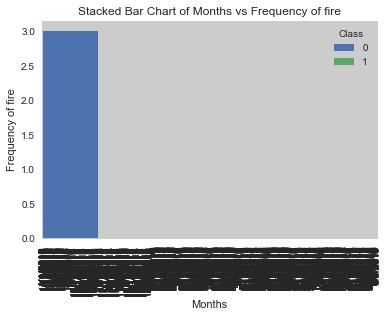

In [11]:
pd.crosstab(data.DATE,data.Class).plot(kind='bar')
plt.title('Stacked Bar Chart of Months vs Frequency of fire')
plt.xlabel('Months')
plt.ylabel('Frequency of fire')
plt.savefig('Months vs Frequency of fire')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C58B0E8710>]],
      dtype=object)

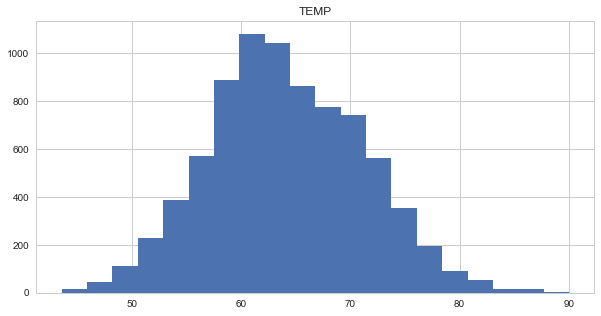

In [12]:
data.hist(column = 'TEMP',bins=20, figsize=(10,5))

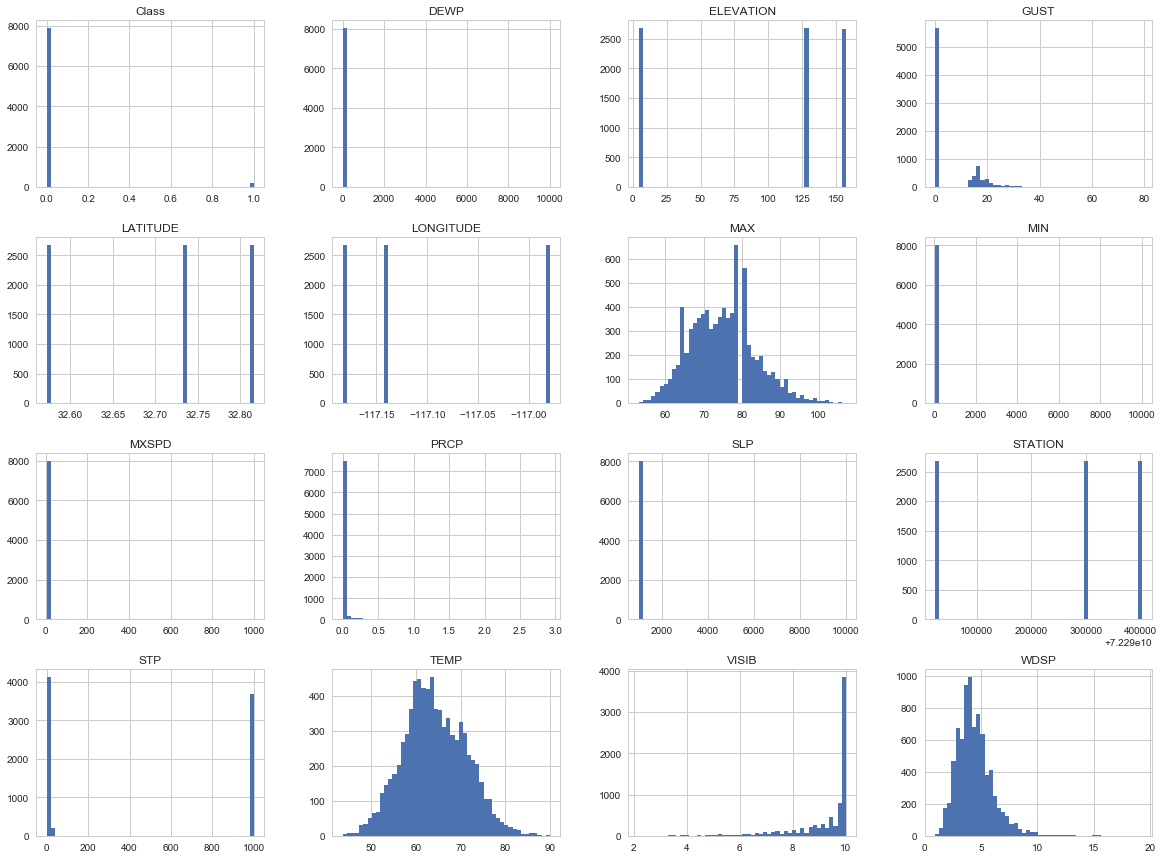

In [13]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

In [14]:
data = data.drop(['NAME'],1)

In [15]:
data = data.drop(['DATE'],1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8034 entries, 0 to 8033
Data columns (total 16 columns):
STATION      8034 non-null int64
LATITUDE     8034 non-null float64
LONGITUDE    8034 non-null float64
ELEVATION    8034 non-null float64
TEMP         8034 non-null float64
DEWP         8034 non-null float64
SLP          8034 non-null float64
STP          8034 non-null float64
VISIB        8034 non-null float64
WDSP         8034 non-null float64
MXSPD        8034 non-null float64
GUST         8034 non-null float64
MAX          8034 non-null float64
MIN          8034 non-null float64
PRCP         8034 non-null float64
Class        8034 non-null int64
dtypes: float64(14), int64(2)
memory usage: 1.4 MB


In [17]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=182)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no fire in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of  fire in oversampled data",len(os_data_y[os_data_y['Class']==1]))
#rint("Number of Fire ",len(os_data_y(os_data_y['Class']==1))
print("Proportion of no fire data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of  fire data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))
#rint("Proportion of fire data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))



length of oversampled data is  12586
Number of no fire in oversampled data 6293
Number of  fire in oversampled data 6293
Proportion of no fire data in oversampled data is  0.5
Proportion of  fire data in oversampled data is  0.5


C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# Imputation of missing values
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Features for feature importances
features = list(X_train.columns)

from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
X_scaled.mean(axis=0)
X_scaled.std(axis=0)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_ 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel imp

In [19]:
cols=['TEMP','DEWP','SLP','STP','VISIB','WDSP','MXSPD','GUST','MAX','MIN','PRCP']
X=os_data_X[cols]
y=os_data_y['Class']

In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.530206
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.235     
Dependent Variable: Class            AIC:              13368.3505
Date:               2019-05-06 08:27 BIC:              13450.1942
No. Observations:   12586            Log-Likelihood:   -6673.2   
Df Model:           10               LL-Null:          -8724.0   
Df Residuals:       12575            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
------------------------------------------------------------------
TEMP        0.4026    0.0174   23.2001  0.0000    0.3686    0.4366
DEWP       -0.0605    0.0038  -15.9768  0.0000   -0.0679   -0

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=242)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[ 986  266]
 [ 224 1042]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1252
           1       0.80      0.82      0.81      1266

   micro avg       0.81      0.81      0.81      2518
   macro avg       0.81      0.81      0.81      2518
weighted avg       0.81      0.81      0.81      2518



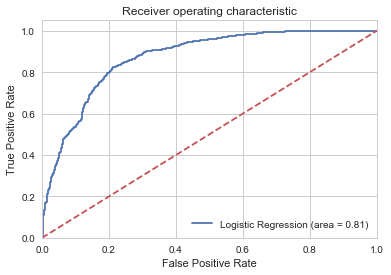

In [334]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [27]:
#Saving the model

import pickle

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(logreg)

In [29]:
# Load the pickled model 
rf_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
rf_from_pickle.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [30]:
#Saving model in binary file

with open('RF_model_pickle','wb') as file:
    pickle.dump(logreg, file)